In [96]:
import arrow
import matplotlib.pyplot as plt
import pandas
import scipy.signal as signal
import seaborn

from matplotlib.ticker import MultipleLocator

%matplotlib inline

In [97]:
days_data = [
    pandas.read_csv('2018.csv', low_memory=False),
    pandas.read_csv('2019.csv', low_memory=False),
    pandas.read_csv('2020.csv', low_memory=False),
]

titles = ('2018', '2019', '2020')

def by_week(days):
    days['Date of Death'] = [arrow.get(d, 'M/D/YY').isocalendar()[1] for d in days['Date of Death']]
    return days.groupby(['Date of Death'])['Date of Death'].count()

weeks_data = [by_week(days) for days in days_data]

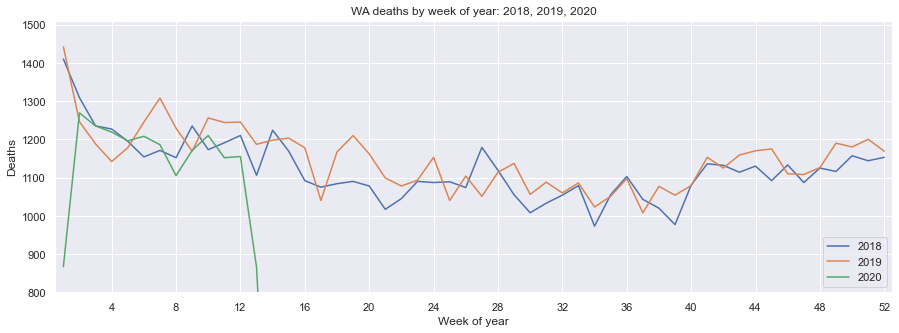

In [108]:
seaborn.set(style="darkgrid")

fig, ax = plt.subplots(figsize=[15,5])

ax.set_title('WA deaths by week of year: 2018, 2019, 2020')

ax.set_xlabel('Week of year')
ax.set_ylabel('Deaths')

ax.xaxis.set_major_locator(MultipleLocator(4))

for title, weeks in zip(titles, weeks_data):
    ax.plot(weeks, label=title)

ax.set_xlim(left=0.5, right=52.5)
ax.set_ylim(bottom=800)
    
ax.legend(loc='lower right')